## Load libraries

In [1]:
#%matplotlib notebook
import yt
#yt.toggle_interactivity()
import caesar
import os
import numpy as np
import matplotlib.pyplot as plt

## Load snapshot into yt

In [152]:
# first we load your snapshot into yt
snap_prefix = 'doug_s18n128'
snap_num = '0015'
cali_num = 'cali_0000'
#cali_num = ''
snap_dir = '/scratch/b/babul/aspadawe/swift_tests/cali_simba'
snap = os.path.join(snap_dir, cali_num, snap_prefix+'_'+snap_num+'.hdf5')
print(snap)
ds = yt.load(snap)
#redshift = ds.parameters['Redshift'][0]
#print('z=%s' % (redshift))

yt : [INFO     ] 2023-04-17 15:13:24,128 SwiftDataset!
yt : [INFO     ] 2023-04-17 15:13:24,139 Calculating time from 1.418e-02 to be 4.375e+17 seconds
yt : [INFO     ] 2023-04-17 15:13:24,172 Assuming length units are in comoving centimetres


/scratch/b/babul/aspadawe/swift_tests/cali_simba/cali_0000/doug_s18n128_0015.hdf5


yt : [INFO     ] 2023-04-17 15:13:24,220 Parameters: current_time              = 4.37485659429611e+17 s
yt : [INFO     ] 2023-04-17 15:13:24,222 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-04-17 15:13:24,223 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-04-17 15:13:24,225 Parameters: domain_right_edge         = [18.38235294 18.38235294 18.38235294]
yt : [INFO     ] 2023-04-17 15:13:24,225 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-04-17 15:13:24,226 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2023-04-17 15:13:24,227 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2023-04-17 15:13:24,227 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2023-04-17 15:13:24,228 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-04-17 15:13:24,229 Parameters: hubble_constant           = 0.68


In [153]:
#h = ds.parameters['hubble_constant']
#h = 0.68
Lcom = ds.domain_width.in_units("Mpc")
#Vcom = Lcom[0] * Lcom[1] * Lcom[2]
Vcom = ds.domain_width.in_units("Mpccm").prod()
print(Lcom)
print("Comoving Volume=%s" % Vcom)

[18.38235294 18.38235294 18.38235294] Mpc
Comoving Volume=6211.597414298313 Mpccm**3


In [163]:
ds.field_list

yt : [INFO     ] 2023-04-17 15:23:20,327 Allocating for 4.194e+06 particles
Loading particle index: 100%|██████████| 8/8 [00:00<00:00, 235.62it/s]


[('PartType0', 'AtomicHydrogenMasses'),
 ('PartType0', 'AveragedStarFormationRates'),
 ('PartType0', 'ComptonYParameters'),
 ('PartType0', 'Coordinates'),
 ('PartType0', 'Densities'),
 ('PartType0', 'DensitiesAtLastAGNEvent'),
 ('PartType0', 'DensitiesBeforeLastAGNEvent'),
 ('PartType0', 'ElectronNumberDensities'),
 ('PartType0', 'ElementMassFractions'),
 ('PartType0', 'EnergiesReceivedFromAGNFeedback'),
 ('PartType0', 'Entropies'),
 ('PartType0', 'EntropiesAtLastAGNEvent'),
 ('PartType0', 'EntropiesBeforeLastAGNEvent'),
 ('PartType0', 'FOFGroupIDs'),
 ('PartType0', 'HeatedByAGNFeedback'),
 ('PartType0', 'HeatedBySNIIFeedback'),
 ('PartType0', 'InternalEnergies'),
 ('PartType0', 'IronMassFractionsFromSNIa'),
 ('PartType0', 'LastAGNFeedbackScaleFactors'),
 ('PartType0', 'Masses'),
 ('PartType0', 'MassesFromAGB'),
 ('PartType0', 'MassesFromSNII'),
 ('PartType0', 'MassesFromSNIa'),
 ('PartType0', 'MaximalTemperatureScaleFactors'),
 ('PartType0', 'MaximalTemperatures'),
 ('PartType0', 'Met

## Load caesar file

In [154]:
# define input file
infile = os.path.join(snap_dir, cali_num, snap_prefix+'_caesar_'+snap_num+'.hdf5')

# load in input file
obj = caesar.load(infile)

yt : [INFO     ] 2023-04-17 15:13:24,546 Opening /scratch/b/babul/aspadawe/swift_tests/cali_simba/cali_0000/doug_s18n128_caesar_0015.hdf5
yt : [INFO     ] 2023-04-17 15:13:24,582 Found 2855 halos
yt : [INFO     ] 2023-04-17 15:13:24,588 Found 192 galaxies


In [155]:
z = obj.simulation.redshift
h = obj.simulation.hubble_constant
#V = obj.simulation.domain_width
#Vcom *= h**(-3)
#Vcom = Vphys * (1+z)**3

print('z=%s' % (z))
print('h=%s' % (h))
print("Comoving Volume=%s" % Vcom)

z=2.220446049250313e-16
h=0.68
Comoving Volume=6211.597414298313 Mpccm**3


In [161]:
obj.simulation.xray_f_gas_limit

AttributeError: 'SimulationAttributes' object has no attribute 'xray_f_gas_limit'

## Create Halo Mass Function (HMF) & Galaxy Stellar Mass Function (GSMF)

In [156]:
halo_dm_masses = np.array([halo.masses['dm'] for halo in obj.halos])
print(len(halo_dm_masses))
print(halo_dm_masses)

2855
[1.75202831e+13 4.10213365e+12 3.68926340e+12 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [157]:
halo_vir_masses = np.array([halo.virial_quantities['m200c'] for halo in obj.halos])
print(len(halo_vir_masses))
print(halo_vir_masses)

2855
[9.69584463e+12 2.63294104e+12 2.89828739e+12 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [158]:
stellar_masses = np.array([gal.masses['stellar'] for gal in obj.galaxies])
len(stellar_masses)

192

8.057116308880772
12.986585647597275
[ 8.25  8.75  9.25  9.75 10.25 10.75 11.25 11.75 12.25 12.75 13.25]
[ 54  93 969 758 335 181  50  22  13   1   0]


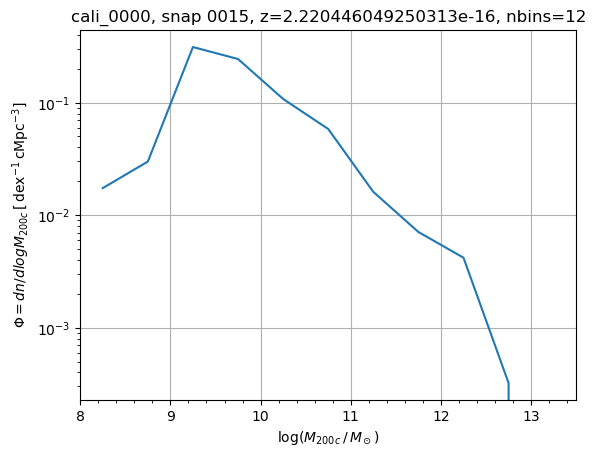

In [167]:
#print(halo_dm_masses.min())
logM = np.log10(halo_vir_masses[halo_vir_masses>0])        #Take logarithm
print(logM.min())
print(logM.max())
dlogM = 0.5                             #bin width in dex
#bins = np.arange(logM.min(), logM.max(), dlogM)
bins = np.arange(8, 14, dlogM)
nbins = len(bins)
#nbins = 10                              #Number of bins to divide data into
#Vcom     = 18**3 * h**(-3)              #Physical box volume in Mpc3
Phi,edg = np.histogram(logM,bins=bins) #Unnormalized histogram and bin edges
#dlogM    = edg[1] - edg[0]                 #Bin size
logM_ax   = edg[0:-1] + dlogM/2.               #Mass axis
print(logM_ax)
print(Phi)
Phi   = Phi / Vcom / dlogM                 #Normalize to volume and bin size

#fig, ax = plt.subplots()
plt.clf()
plt.yscale('log')
plt.xlabel(r'$\log(M_{200c}\,/\,M_\odot)$')
plt.ylabel(r'$\Phi=dn/dlogM_{200c}\,[\,\mathrm{dex}^{-1}\,\mathrm{cMpc}^{-3}]$')
plt.title(r'%s, snap %s, z=%s, nbins=%s' % (cali_num, snap_num, z, nbins))
plt.grid()
plt.minorticks_on()
plt.plot(logM_ax,Phi,ls='-')

8.230542065000947
8.854910460205478
[ 8.25  8.75  9.25  9.75 10.25 10.75 11.25 11.75 12.25 12.75]
[150  42   0   0   0   0   0   0   0   0]


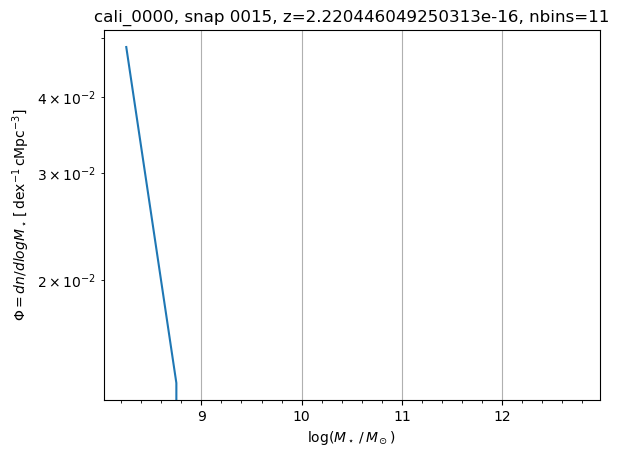

In [166]:
logM = np.log10(stellar_masses)        #Take logarithm
print(logM.min())
print(logM.max())
dlogM = 0.5                             #bin width in dex
#bins = np.arange(logM.min(), logM.max(), dlogM)
bins = np.arange(8, 13.5, dlogM)
nbins = len(bins)
#nbins = 10                              #Number of bins to divide data into
#Vcom     = 18**3 * h**(-3)              #Physical box volume in Mpc3
Phi,edg = np.histogram(logM,bins=bins) #Unnormalized histogram and bin edges
#dlogM    = edg[1] - edg[0]                 #Bin size
logM_ax   = edg[0:-1] + dlogM/2.               #Mass axis
print(logM_ax)
print(Phi)
Phi   = Phi / Vcom / dlogM                 #Normalize to volume and bin size

#fig, ax = plt.subplots()
plt.clf()
plt.yscale('log')
plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\Phi=dn/dlogM_\star\,[\,\mathrm{dex}^{-1}\,\mathrm{cMpc}^{-3}]$')
plt.title(r'%s, snap %s, z=%s, nbins=%s' % (cali_num, snap_num, z, nbins))
#plt.ylabel(r'$\log{(\Phi\,[\,\mathrm{dex}^{-1}\,\mathrm{cMpc}^{-3}])}$')
#plt.plot(Max,Phi,ls='steps-post')
plt.grid()
plt.minorticks_on()
#plt.tick_params(axis="y",direction="in")#, left="off",labelleft="on")
plt.plot(logM_ax,Phi,ls='-')
#plt.plot(Max,np.log10(Phi),ls='-')